In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
name = 'VTI'
start_point = 900
steps = 5
data = pd.read_csv('processed_data/Daily_Regression/rd_' + name + '.csv')
pred_len = len(data['processed_price'][start_point:])//steps * steps

In [29]:
date =  data['Date'][start_point:].values[0:pred_len]
y_pred = np.array([])
y_true = data['processed_price'][start_point:].values[0:pred_len]

for i in range(pred_len//steps):
    
    # moveing closing price 
    
    x_train = data['processed_price'][0+i*steps:start_point+i*steps].values
    # model
    model = ARIMA(x_train, order=(1,1,0))
    model_fit = model.fit()

    # forecasting and save the output 
    output = model_fit.forecast(steps=steps)
    y_pred = np.append(y_pred,output)


/Users/baihaohuang/opt/anaconda3/envs/untitled/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/baihaohuang/opt/anaconda3/envs/untitled/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/baihaohuang/opt/anaconda3/envs/untitled/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/baihaohuang/opt/anaconda3/envs/untitled/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/baihaohuang/opt/anaconda3/envs/untitled/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Ma

In [30]:
scaler = np.load('scaler/Daily.npy')
if name == 'AGG':
    max_value = scaler[1,0]
    min_value = scaler[1,1]
elif name == 'DBC':
    max_value = scaler[2,0]
    min_value = scaler[2,1]
elif name == 'VIX':
    max_value = scaler[3,0]
    min_value = scaler[3,1]
elif name == 'VTI':
    max_value = scaler[0,0]
    min_value = scaler[0,1]

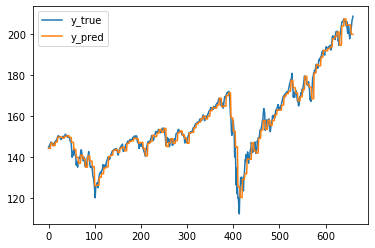

In [31]:
y_true_transform = y_true * (max_value - min_value) + min_value
y_pred_transform = y_pred * (max_value - min_value) + min_value
plt.plot(y_true_transform,label='y_true')
plt.plot(y_pred_transform,label='y_pred')
plt.legend()

In [32]:
print(mean_absolute_error(y_true_transform ,y_pred_transform))

2.2366306896081816


In [33]:
residual = y_true_transform - y_pred_transform

In [34]:
# save the result
result = pd.DataFrame(data={'Date':date,
                            'y_true':y_true_transform,
                            'y_pred':y_pred_transform})


result.to_csv('prediction_result/Arima_Reg/' + name + '_Reg.csv',index=False)

In [35]:
# save the residual data
df = pd.DataFrame()
df['Date'] = date
df['Residual_y'] = residual
df['Residual_x'] =residual
# shift data 
df.iloc[:,2:] = df.iloc[:,2:].shift(1)
df = df.dropna()
# save the data 
df.to_csv('residual/feature/'+ name + '.csv',index = False)